In [1]:
# CREDITS
#https://www.youtube.com/watch?v=7azmUg6XZA0 Open Source Student vaderSentiment and pandas video
#https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS Corey Schafer pandas playlist videos
#https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

# CITE 
#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
import pandas as pd

In [2]:
#with open('results/khanacademy/_b-2rZpX5z4.json', 'r') as f:
    #df = json.load(f)

#COMPARE BETWEEN 2 VIDEOS TO START OFF THE SENTIMENT ANALYSIS MODEL  
df1 = pd.read_json('results/crashcourse/_O2sg-PGhEg.json')

df2 = pd.read_json('results/crashcourse/_tULRch1PRQ.json')

#AUTOMATE
#for video_id in video_ids_crashcourse.json:
#   df = pd.read_json(f'results/crashcourse/{video_id}.json')
#   if some json files with those video_ids do not exist, continue to the next (eg. 492 files in crashcourse folder instead of 1,439 videos on crashcourse youtube channel)

In [5]:
df1.head()

,comment_by,comment_text,comment_date,likes_count
0,sam JD,awesome host.. thank u so much,2022-07-14T09:38:00Z,1
1,Franzi Z,I love this series more with every episode I w...,2020-06-18T17:26:03Z,4
2,Wade Allen,When I see images or renderings of super clust...,2020-06-17T17:46:52Z,0
3,Susurrus,It&#39;s kinda like a video game where you try...,2020-06-10T12:41:45Z,1
4,Eugene Scott,Can someone shed some light on why a super mas...,2020-06-06T00:10:48Z,0


In [7]:
df2.head()

,comment_by,comment_text,comment_date,likes_count
0,Rich Invents,"Excellent video, very informative. ONE sugges...",2022-08-15T14:58:30Z,0
1,F Wily,"Talk faster, you are too slow. I only have a 3...",2020-05-16T14:55:28Z,4
2,Sedat Ayyıldız,I like your academic and scientific jokes :)),2020-05-06T10:26:24Z,1
3,Eva Lynn,This mans hilarious,2020-04-28T09:52:08Z,0
4,Timothy Little,The best way to rob a bank is to own one,2020-04-09T07:37:44Z,1


In [3]:
# CITE 
#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

analyzer = SentimentIntensityAnalyzer()
positive1 = []
negative1 = []
neutral1 = []
compound1 = []
sentiment1 = []

positive2 = []
negative2 = []
neutral2 = []
compound2 = []
sentiment2 = []

In [4]:
#for line in df['Comment']:
for line in range(df1.shape[0]): 
#range() method returns total number or length or indexes of 2d array data's rows [0] or data's columns [1]
#use df.shape[0] to only loop through rows while shape[1] gives columns

    comments = df1.iloc[line, 1] #iloc returns the value of looped lines/rows of the first[1] column 'Comment' key index
    #print(comments)
    comments_analyzed = analyzer.polarity_scores(comments)
    #print(comments_analyzed)
    #print("{:-<65} {}".format(comments, str(comments_analyzed)))
    
    if comments_analyzed["compound"] >= 0.05:
        sentiment = 'positive'
    elif comments_analyzed["compound"] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    #if comments_analyzed["compound"] >= 0:
        #sentiment = 'positive'
    #else:
        #sentiment = 'negative'

#RUN ONCE
    negative1.append(comments_analyzed["neg"])
    #negative += comments_analyzed["neg"] is not suitable for this

    positive1.append(comments_analyzed["pos"])
    #print(positive)

    neutral1.append(comments_analyzed["neu"])
    #print(neutral)

    compound1.append(comments_analyzed["compound"])
    #print(compound)

    sentiment1.append(sentiment)

     

In [5]:
#for line in df['Comment']:
for line in range(df2.shape[0]): 
#range() method returns total number or length or indexes of 2d array data's rows [0] or data's columns [1]
#use df.shape[0] to only loop through rows while shape[1] gives columns

    comments = df2.iloc[line, 1] #iloc returns the value of looped lines/rows of the first[1] column 'Comment' key index
    #print(comments)
    comments_analyzed = analyzer.polarity_scores(comments)
    #print(comments_analyzed)
    #print("{:-<65} {}".format(comments, str(comments_analyzed)))
    
    if comments_analyzed["compound"] >= 0.05:
        sentiment = 'positive'
    elif comments_analyzed["compound"] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    #if comments_analyzed["compound"] >= 0:
        #sentiment = 'positive'
    #else:
        #sentiment = 'negative'


#RUN ONCE
    negative2.append(comments_analyzed["neg"])
    #negative += comments_analyzed["neg"] is not suitable for this

    positive2.append(comments_analyzed["pos"])
    #print(positive)

    neutral2.append(comments_analyzed["neu"])
    #print(neutral)

    compound2.append(comments_analyzed["compound"])
    #print(compound)

    sentiment2.append(sentiment)

cross checking

In [6]:
df1.shape

(1375, 4)

In [6]:
len(negative1)

1375

In [7]:
df2.shape

(222, 4)

In [8]:
len(negative2)

222

In [20]:
#compare visualization graph of averages of 1 video to commentaire's graph of same video
#total of neg / total rows = avg of neg
#neutral + positive = positive

#word cloud 
#combine words from all positive comments from all videos of channel list

In [9]:
df1.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count'], dtype='object')

In [11]:
df2.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count'], dtype='object')

In [6]:
#add new columns to df1


#add new columns and their values to dataframe version of json
df1["negative"] = negative1 #create and add new column named Negative
df1["neutral"] = neutral1
df1["positive"] = positive1
df1["compound"] = compound1
df1["sentiment"] = sentiment1

#pd.set_option('display.max_columns', None)
#print(df.head())


#print(df1.nlargest(5, ['Negative']))
#print(df1.nlargest(5, ['Neutral']))
#print(df1.nlargest(5, ['Positive']))


#average sentiment scores of 1st video comments
neg_avg1 = df1['negative'].mean()
print(neg_avg1)

neu_avg1 = df1['neutral'].mean()
print(neu_avg1)

pos_avg1 = df1['positive'].mean()
print(pos_avg1)

compound_avg1 = df1['compound'].mean()
print(compound_avg1)


0.038584
0.8247447272727272
0.13666109090909093
0.18707592727272726


In [7]:
#add new columns to df2


#add new columns and their values to dataframe version of json
df2["negative"] = negative2 #create and add new column named Negative
df2["neutral"] = neutral2
df2["positive"] = positive2
df2["compound"] = compound2
df2["sentiment"] = sentiment2

#pd.set_option('display.max_columns', None)
#print(df.head())


#print(df1.nlargest(5, ['Negative']))
#print(df1.nlargest(5, ['Neutral']))
#print(df1.nlargest(5, ['Positive']))


#average sentiment scores of 1st video comments
neg_avg2 = df2['negative'].mean()
print(neg_avg2)

neu_avg2 = df2['neutral'].mean()
print(neu_avg2)

pos_avg2 = df2['positive'].mean()
print(pos_avg2)

compound_avg2 = df2['compound'].mean()
print(compound_avg2)

0.08393693693693693
0.7655900900900902
0.1504864864864865
0.12650900900900902


In [12]:
df2.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count', 'negative',
       'neutral', 'positive', 'compound', 'sentiment'],
      dtype='object')

In [15]:
df1.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count', 'negative',
       'neutral', 'positive', 'compound', 'sentiment'],
      dtype='object')

In [16]:
print(len(df1['comment_text']))

1375


In [17]:
print(len(df1['negative']))

1375


In [20]:
print(df1.nlargest(5, ['neutral']))

            comment_by                                       comment_text  \
6          Andrea Rupe  How many galaxies are there? Can we count them...   
7        faze minecrft  I made the name &quot;milky shrub&quot; (searc...   
8            fei jiang  i thought that after big bang every object is ...   
9          jmerdur 412                                      Andromeda way   
11  Angelina Nicholaou                                           Medalaxy   

            comment_date  likes_count  negative  neutral  positive  compound  \
6   2020-06-02T04:46:43Z            1       0.0      1.0       0.0       0.0   
7   2020-06-01T23:03:59Z            0       0.0      1.0       0.0       0.0   
8   2020-06-01T04:53:04Z            1       0.0      1.0       0.0       0.0   
9   2020-06-01T02:25:52Z            0       0.0      1.0       0.0       0.0   
11  2020-05-28T00:44:04Z            0       0.0      1.0       0.0       0.0   

   sentiment  
6    neutral  
7    neutral  
8    neutra

In [8]:
#https://www.geeksforgeeks.org/data-visualization-different-charts-python/
#A pie chart represents numbers in percentages, and the total sum of all segments needs to equal 100%
#bar chart of 2 bars
#x axis = video's neg and pos averages
#y axis = average score values


posavgpercentage1 = pos_avg1*100
negavgpercentage1 = neg_avg1*100
neuavgpercentage1 = neu_avg1*100
compoundavgpercentage1 = compound_avg1*100

print('df1 \n positive % = {} \n negative % = {} \n neutral % = {} \n compound % = {}'.format(posavgpercentage1, negavgpercentage1, neuavgpercentage1, compoundavgpercentage1))

#if compoundavgpercentage1 > 50:
#   print('df1 sentiment is positive overall')
#elseif compoundavgpercentage1 < 50:
#   print('df1 sentiment is negative overall')
#else:
#   print('df1 sentiment is neutral overall')

df1 
 positive % = 13.666109090909092 
 negative % = 3.8584 
 neutral % = 82.47447272727271 
 compound % = 18.707592727272726


# overall video sentiment based on the total percentages of individual positive, negative, neutral scores

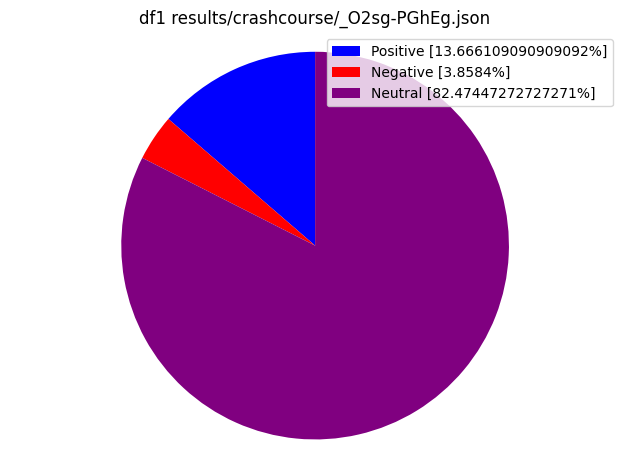

In [9]:
import matplotlib.pyplot as plt

labels = ['Positive ['+str(posavgpercentage1)+'%]', 'Negative ['+str(negavgpercentage1)+'%]', 'Neutral ['+str(neuavgpercentage1)+'%]']
sizes = [posavgpercentage1, negavgpercentage1, neuavgpercentage1]
colors = ['blue','red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df1 results/crashcourse/_O2sg-PGhEg.json") 

#def dump() function to extract video_title and use video_title to name csv file of comments of your own code

plt.axis('equal')
plt.tight_layout()
plt.show()

In [10]:
posavgpercentage2 = pos_avg2*100
negavgpercentage2 = neg_avg2*100
neuavgpercentage2 = neu_avg2*100
compoundavgpercentage2 = compound_avg2*100

print('df2 \n positive % = {} \n negative % = {} \n neutral % = {} \n compound % = {}'.format(posavgpercentage2, negavgpercentage2, neuavgpercentage2, compoundavgpercentage2))

#if compoundavgpercentage2 > 50:
#   print('df2 sentiment is positive overall')
#elseif compoundavgpercentage2 < 50:
#   print('df2 sentiment is negative overall')
#else:
#   print('df2 sentiment is neutral overall')



df2 
 positive % = 15.04864864864865 
 negative % = 8.393693693693693 
 neutral % = 76.55900900900902 
 compound % = 12.650900900900902


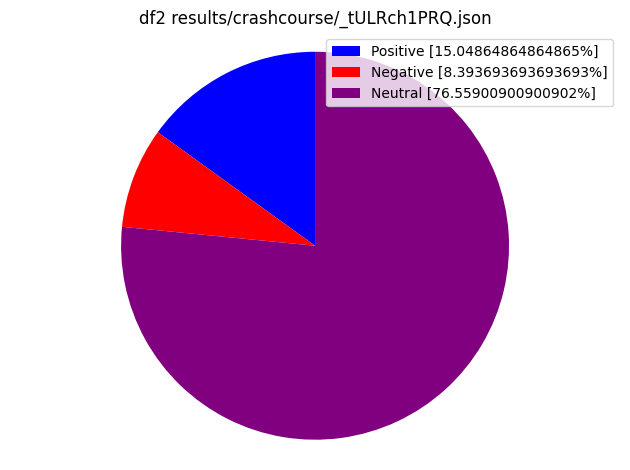

In [11]:
labels = ['Positive ['+str(posavgpercentage2)+'%]', 'Negative ['+str(negavgpercentage2)+'%]', 'Neutral ['+str(neuavgpercentage2)+'%]']
sizes = [posavgpercentage2, negavgpercentage2, neuavgpercentage2]
colors = ['blue','red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df2 results/crashcourse/_tULRch1PRQ.json") 

#def dump() function to extract video_title and use video_title to name csv file of comments of your own code

plt.axis('equal')
plt.tight_layout()
plt.show()

In [17]:
#https://pypi.org/project/emoji/
#https://unicode.org/emoji/charts/full-emoji-list.html

import emoji
print(emoji.emojize(':grinning_face:')) 
print(emoji.emojize(':thumbs_up:'))

😀
👍


# with emojis

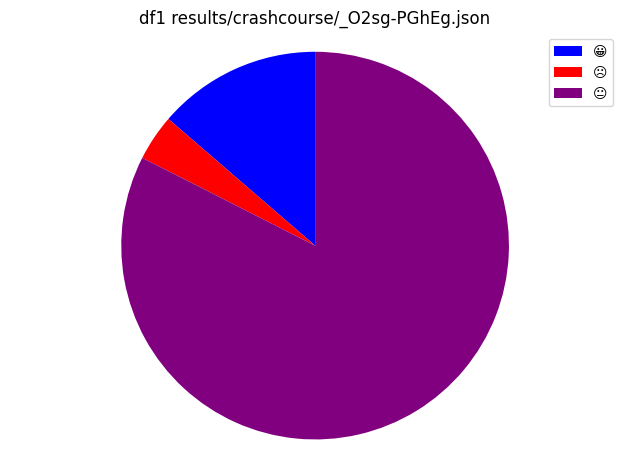

In [13]:
labels = [emoji.emojize(':grinning_face:'), emoji.emojize(':frowning_face:'), emoji.emojize(':neutral_face:')]
sizes = [posavgpercentage1, negavgpercentage1, neuavgpercentage1]
colors = ['blue', 'red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df1 results/crashcourse/_O2sg-PGhEg.json") 

plt.axis('equal')
plt.tight_layout()
plt.show()

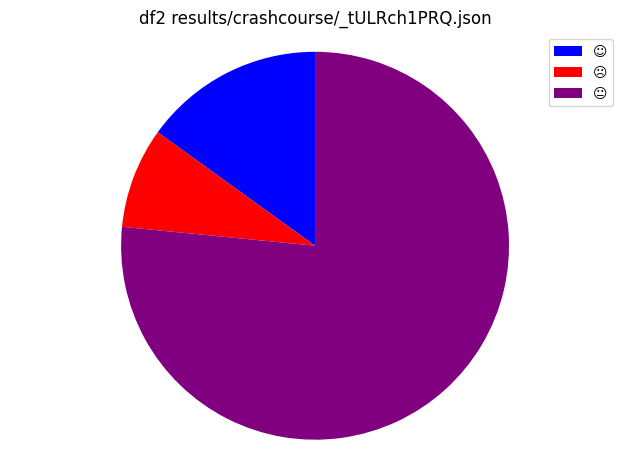

In [35]:
labels = [emoji.emojize(':smiling_face:'), emoji.emojize(':frowning_face:'), emoji.emojize(':neutral_face:')]
sizes = [posavgpercentage2, negavgpercentage2, neuavgpercentage2]
colors = ['blue', 'red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df2 results/crashcourse/_tULRch1PRQ.json") 

plt.axis('equal')
plt.tight_layout()
plt.show()

# amount of sentiments based on compound scoring of every comment
### e.g: 1 positive is of 1 comment

<AxesSubplot:>

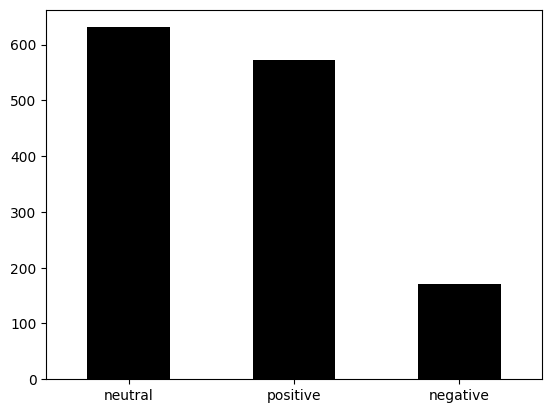

In [12]:
result1 = df1['sentiment'].value_counts()
result1.plot(kind='bar', rot=0, color=['black', 'black', 'black'])

<AxesSubplot:>

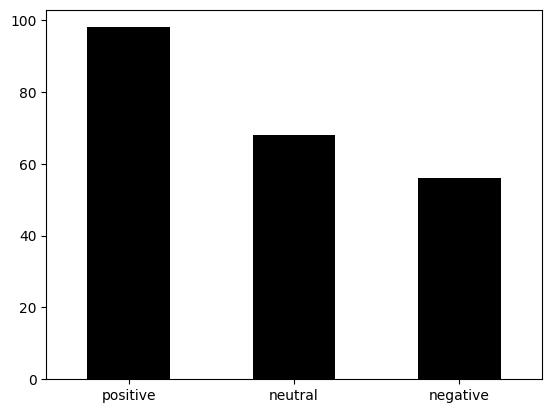

In [13]:
result2 = df2['sentiment'].value_counts()
result2.plot(kind='bar', rot=0, color=['black', 'black', 'black'])

In [ ]:
# CREDITS https://github.com/cjhutto/vaderSentiment#about-the-scoring
# CITE Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

# comment predictions and posts over time

In [12]:
df1['comment_date']

0       2022-07-14T09:38:00Z
1       2020-06-18T17:26:03Z
2       2020-06-17T17:46:52Z
3       2020-06-10T12:41:45Z
4       2020-06-06T00:10:48Z
                ...         
1370    2015-11-05T22:26:29Z
1371    2015-11-05T22:24:14Z
1372    2015-11-05T22:23:58Z
1373    2015-11-05T22:23:57Z
1374    2015-11-05T22:23:19Z
Name: comment_date, Length: 1375, dtype: object

In [18]:
# import re

# #duration info from YouTube API does not come in the hour:minute:second format so...
# #compile a regular expression using the imported re python library module
# hoursformat = re.compile(r'(\d+)H')
# minutesformat = re.compile(r'(\d+)M')
# secondsformat = re.compile(r'(\d+)S')

# total_seconds = 0

# #table1.py continues on formatting duration
# #then analyse here

# for row in range(df.shape[0]):
#     datesandtimes = df.loc[row, 'Date']
#     datesandtimes = datesandtimes.split()
#     date = datesandtimes[0]
#     time = datesandtimes[len(datesandtimes)-1]
#     #print(f'{date} {time}')

# df['date'] = date
# df['time'] = time

# df.drop(columns=['date', 'time'], inplace=True)
# #you can also drop specific row(s)

# # df.drop(index=0) only one row dropped

# # df.drop(index=df[df['last_name'] == 'Rogers'].index) rows with Rogers in last_name column dropped
# # aka
# # filt = df['last_name'] == 'Rogers'
# # df.drop(index=df[filt].index)

# #-------------------------------------------------------------------------------------------------
# #below is a more efficient and easier way (without for loop)

# type(df['Date'][0]) #'2018-05-17 23:26:08' is a string so could use split method on it

# df[['date', 'time']] = df['Date'].str.split(' ', expand=True)

# df

dates1 = []
times1 = []

for dateandtime in df1['comment_date']:
    dateandtime = dateandtime.replace('T', ' ')
    dateandtime = dateandtime.replace('Z', '')
    
    dateandtime = dateandtime.split()
    date = dateandtime[0]
    timing = dateandtime[1]
    
    dates1.append(date)
    times1.append(timing)

df1['date'] = dates1
df1['time'] = times1

# Sort the rows of dataframe by 'date' column
sorted_df1 = df1.sort_values(by = 'date')

df1.tail()


,comment_by,comment_text,comment_date,likes_count,negative,neutral,positive,compound,sentiment,date,time
1370,Somillian,Under 301 club.,2015-11-05T22:26:29Z,2,0.0,1.000,0.000,0.0000,neutral,2015-11-05,22:26:29
1371,Mythri,First Like LOLOL,2015-11-05T22:24:14Z,2,0.0,0.444,0.556,0.3612,positive,2015-11-05,22:24:14
1372,Get Fixed,second,2015-11-05T22:23:58Z,0,0.0,1.000,0.000,0.0000,neutral,2015-11-05,22:23:58
1373,ZeroKelvin,Second!,2015-11-05T22:23:57Z,0,0.0,1.000,0.000,0.0000,neutral,2015-11-05,22:23:57
1374,BDogg Volz,F1RST!,2015-11-05T22:23:19Z,0,0.0,1.000,0.000,0.0000,neutral,2015-11-05,22:23:19


In [19]:
sorted_df1.head()

,comment_by,comment_text,comment_date,likes_count,negative,neutral,positive,compound,sentiment,date,time
1374,BDogg Volz,F1RST!,2015-11-05T22:23:19Z,0,0.000,1.000,0.000,0.0000,neutral,2015-11-05,22:23:19
1286,Noel Garayúa,"I like his be attitude, is more dramatic, more...",2015-11-05T23:22:53Z,0,0.000,0.645,0.355,0.8276,positive,2015-11-05,23:22:53
1287,Jon Sleeper,Carl Sagan had it right when he said that we a...,2015-11-05T23:22:40Z,0,0.000,1.000,0.000,0.0000,neutral,2015-11-05,23:22:40
1288,TheGinginator14,So are you saying... That the local group is j...,2015-11-05T23:21:36Z,0,0.000,1.000,0.000,0.0000,neutral,2015-11-05,23:21:36
1289,Brett Dupree,"Alright, my brain hurts",2015-11-05T23:20:52Z,0,0.437,0.282,0.282,-0.2732,negative,2015-11-05,23:20:52


<AxesSubplot:>

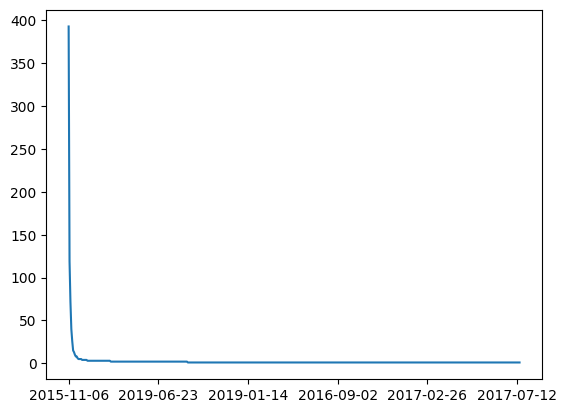

In [20]:
predictionsovertime1 = sorted_df1['date'].value_counts()
predictionsovertime1.plot(kind='line')

In [21]:
sorted_df1['date'].value_counts()

2015-11-06    393
2015-11-05    119
2015-11-07     72
2015-11-09     40
2015-11-08     26
             ... 
2017-07-17      1
2017-07-12      1
2017-07-05      1
2017-07-04      1
2022-07-14      1
Name: date, Length: 504, dtype: int64

In [22]:
dates2 = []
times2 = []

for dateandtime in df2['comment_date']:
    dateandtime = dateandtime.replace('T', ' ')
    dateandtime = dateandtime.replace('Z', '')
    
    dateandtime = dateandtime.split()
    date = dateandtime[0]
    timing = dateandtime[1]
    
    dates2.append(date)
    times2.append(timing)

df2['date'] = dates2
df2['time'] = times2

# Sort the rows of dataframe by 'date' column
sorted_df2 = df2.sort_values(by = 'date')

df2.tail()

,comment_by,comment_text,comment_date,likes_count,negative,neutral,positive,compound,sentiment,date,time
217,Christopher Caldwell,Fiscal Falcon,2016-02-13T01:41:08Z,0,0.0,1.0,0.0,0.000,neutral,2016-02-13,01:41:08
218,Port Ewan,No,2016-02-13T01:40:44Z,0,1.0,0.0,0.0,-0.296,negative,2016-02-13,01:40:44
219,Shah Al-Mamun,3rd,2016-02-13T01:40:26Z,0,0.0,1.0,0.0,0.000,neutral,2016-02-13,01:40:26
220,Shack_Em,Second,2016-02-13T01:39:40Z,0,0.0,1.0,0.0,0.000,neutral,2016-02-13,01:39:40
221,allthewaystartrek,First,2016-02-13T01:38:28Z,3,0.0,1.0,0.0,0.000,neutral,2016-02-13,01:38:28


In [23]:
sorted_df2.tail()

,comment_by,comment_text,comment_date,likes_count,negative,neutral,positive,compound,sentiment,date,time
4,Timothy Little,The best way to rob a bank is to own one,2020-04-09T07:37:44Z,1,0.214,0.536,0.250,0.1531,positive,2020-04-09,07:37:44
3,Eva Lynn,This mans hilarious,2020-04-28T09:52:08Z,0,0.000,0.426,0.574,0.4019,positive,2020-04-28,09:52:08
2,Sedat Ayyıldız,I like your academic and scientific jokes :)),2020-05-06T10:26:24Z,1,0.000,0.571,0.429,0.5423,positive,2020-05-06,10:26:24
1,F Wily,"Talk faster, you are too slow. I only have a 3...",2020-05-16T14:55:28Z,4,0.000,1.000,0.000,0.0000,neutral,2020-05-16,14:55:28
0,Rich Invents,"Excellent video, very informative. ONE sugges...",2022-08-15T14:58:30Z,0,0.027,0.764,0.209,0.8687,positive,2022-08-15,14:58:30


<AxesSubplot:>

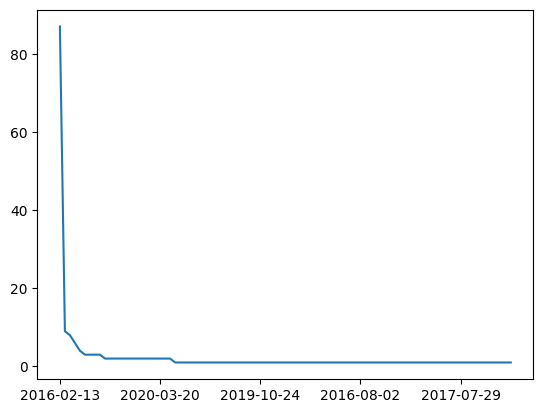

In [24]:
predictionsovertime2 = sorted_df2['date'].value_counts()
predictionsovertime2.plot(kind='line')

In [25]:
sorted_df2['date'].value_counts()


2016-02-13    87
2016-02-14     9
2016-02-15     8
2016-02-16     6
2016-02-20     4
              ..
2017-03-02     1
2017-02-03     1
2017-01-09     1
2016-12-13     1
2022-08-15     1
Name: date, Length: 91, dtype: int64

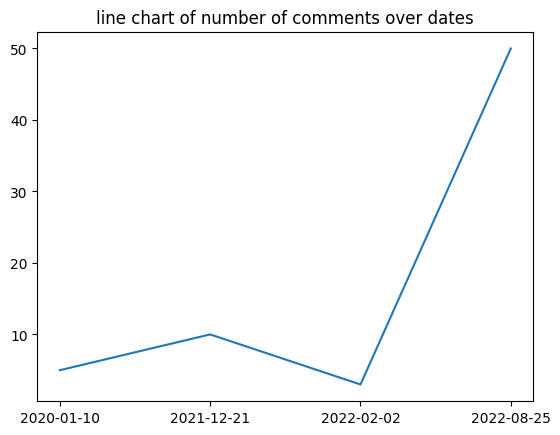

In [27]:
#plt.plot(dates1, total_comments)
##Adding description of the plotting
#plt.title("df1 results/crashcourse/_O2sg-PGhEg.json")
#plt.xlabel("Dates")
#plt.xlabel(list(dates1))
#plt.ylabel("Number of comments")
#plt.show()




#What I expected the predictions over time would look like...

dates = ['2020-01-10', '2021-12-21', '2022-02-02', '2022-08-25']
total_comments = [5, 10, 3, 50]
plt.plot(dates, total_comments)
plt.title("line chart of number of comments over dates")
#plt.xlabel("Dates")
#plt.xlabel(list(dates1))
#plt.ylabel("Number of comments")
plt.show()

In [21]:
sorted_df1['date'][0]

'2022-07-14'

In [23]:
sorted_df1['date']

1374    2015-11-05
1286    2015-11-05
1287    2015-11-05
1288    2015-11-05
1289    2015-11-05
           ...    
4       2020-06-06
3       2020-06-10
2       2020-06-17
1       2020-06-18
0       2022-07-14
Name: date, Length: 1375, dtype: object

In [ ]:
##A simple illustration
#df1 = pd.read_json('results/crashcourse/_O2sg-PGhEg.json')
#dates1 = df1['date']
#dates1 = dates1.sort_values(ascending=True)

# dates1 = sorted_df1['date']
# #print(dates1)

# #comments = df1['comment_text']

# number_of_comments_per_day = 0
# total_comments = []
# count = len(dates1)-1

# for date in dates1:
    
#     if date == sorted_df1['date'][count]:
#         #number_of_comments_per_day += 1
#         print('match')

#     if date != sorted_df1['date'][count]:
#         #number_of_comments_per_day = 0
#         print('not')
    
#     count-=1
#     #total_comments.append([number_of_comments_per_day])

# #print(total_comments)
    
    #previously...
    #e.g: 2015-11-05 | +1 comment | 1 comment total
    #     2015-11-05 | +1 comment | 2 comments total

    #how to make date column, in df1, unique and delete repeated same dates?
    #e.g: 2015-11-05 | 2 comments total
#dates1 = dates1.drop_duplicates()
#dates1 = list(dates1)

#print('Number of comments = '+str(len(total_comments)))
#print('Number of non duplicate dates = '+str(len(dates1)))



In [2]:
#hardcoded... 
file = 'results/crashcourse.json'
data = None

with open(file, 'r') as f:
    data = json.load(f)

channel_id, stats = data.popitem()
print(channel_id)

channel_stats = stats['channel_statistics']

video_stats = stats['video_data']


UCX6b17PVsYBQ0ip5gyeme-Q


In [3]:
#analyse video stats
#video_stats.items() value returned after df.popitem()
sorted_vids = sorted(video_stats.items(), key=lambda item: int(item[1]['viewCount']), reverse=True)
#in reverse/descending order so most views in the beginning

stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    
    #sometimes videos have comments disabled so some might not have the key 'commentCount'
    key = "commentCount"
    if key in vid[1].keys():
        comments = int(vid[1]["commentCount"]) 
    else:
        comments = 0

    duration = vid[1]['duration']
    stats.append([video_id, title, views, likes, comments, duration])

df = pd.DataFrame(stats, columns=['video_id', 'title', 'views', 'likes', 'comments','duration'])

df.head(10)
#prints the sorted vids by most views/based on viewCount 
#Top 10 videos correlation with comment sentiment?

,video_id,title,views,likes,comments,duration
0,vo4pMVb0R6M,Intro to Psychology: Crash Course Psychology #1,12787803,215402,7144,PT10M54S
1,1wo2TLlMhiw,Conflict in Israel and Palestine: Crash Course...,10942320,182711,0,PT12M53S
2,uBGl2BujkPQ,Introduction to Anatomy & Physiology: Crash Co...,8111652,117613,3152,PT11M20S
3,bO7FQsCcbD8,"The Constitution, the Articles, and Federalism...",7107838,63457,6493,PT13M4S
4,Qymp_VaFo9M,Let's Talk About Sex: Crash Course Psychology #27,6812615,89790,4173,PT11M36S
5,3ez10ADR_gM,Intro to Economics: Crash Course Econ #1,6512609,93389,4427,PT12M9S
6,0RRVV4Diomg,The Periodic Table: Crash Course Chemistry #4,6505958,71498,3206,PT11M22S
7,1A_CAkYt3GY,What is Philosophy?: Crash Course Philosophy #1,6201843,118890,5937,PT10M35S
8,Cd2ch4XV84s,How World War I Started: Crash Course World Hi...,5973545,61702,4953,PT9M10S
9,GCQfMWAikyU,The Great Depression: Crash Course US History #33,5933162,59880,5315,PT14M27S


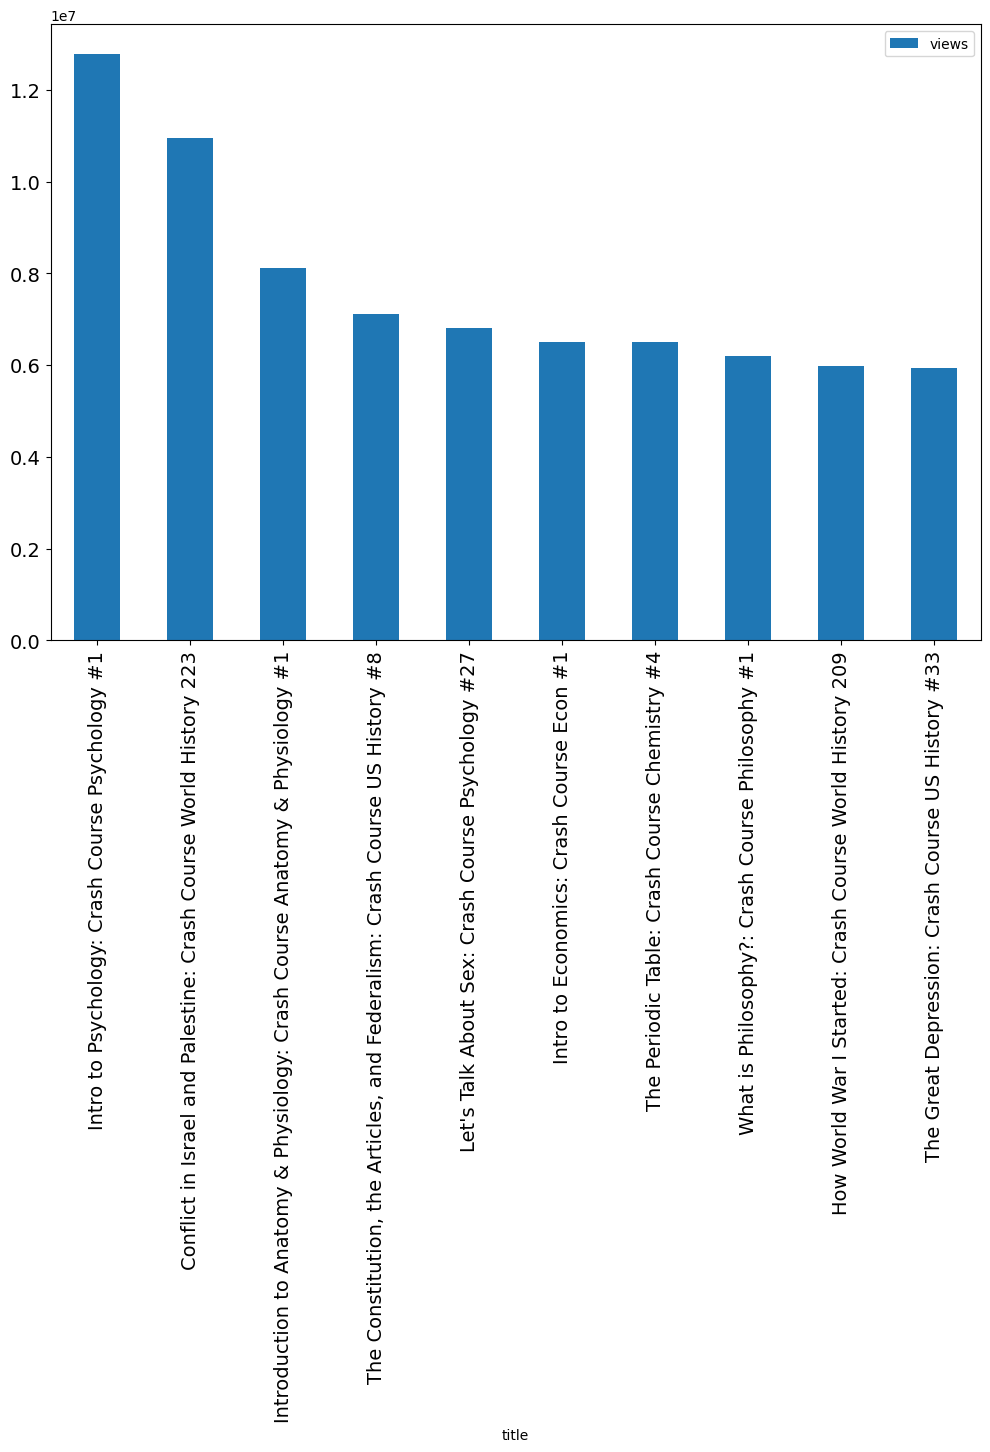

In [4]:
top10 = df.head(10)

ax = top10.plot.bar(x='title', y='views', figsize=(12,8), fontsize=14)

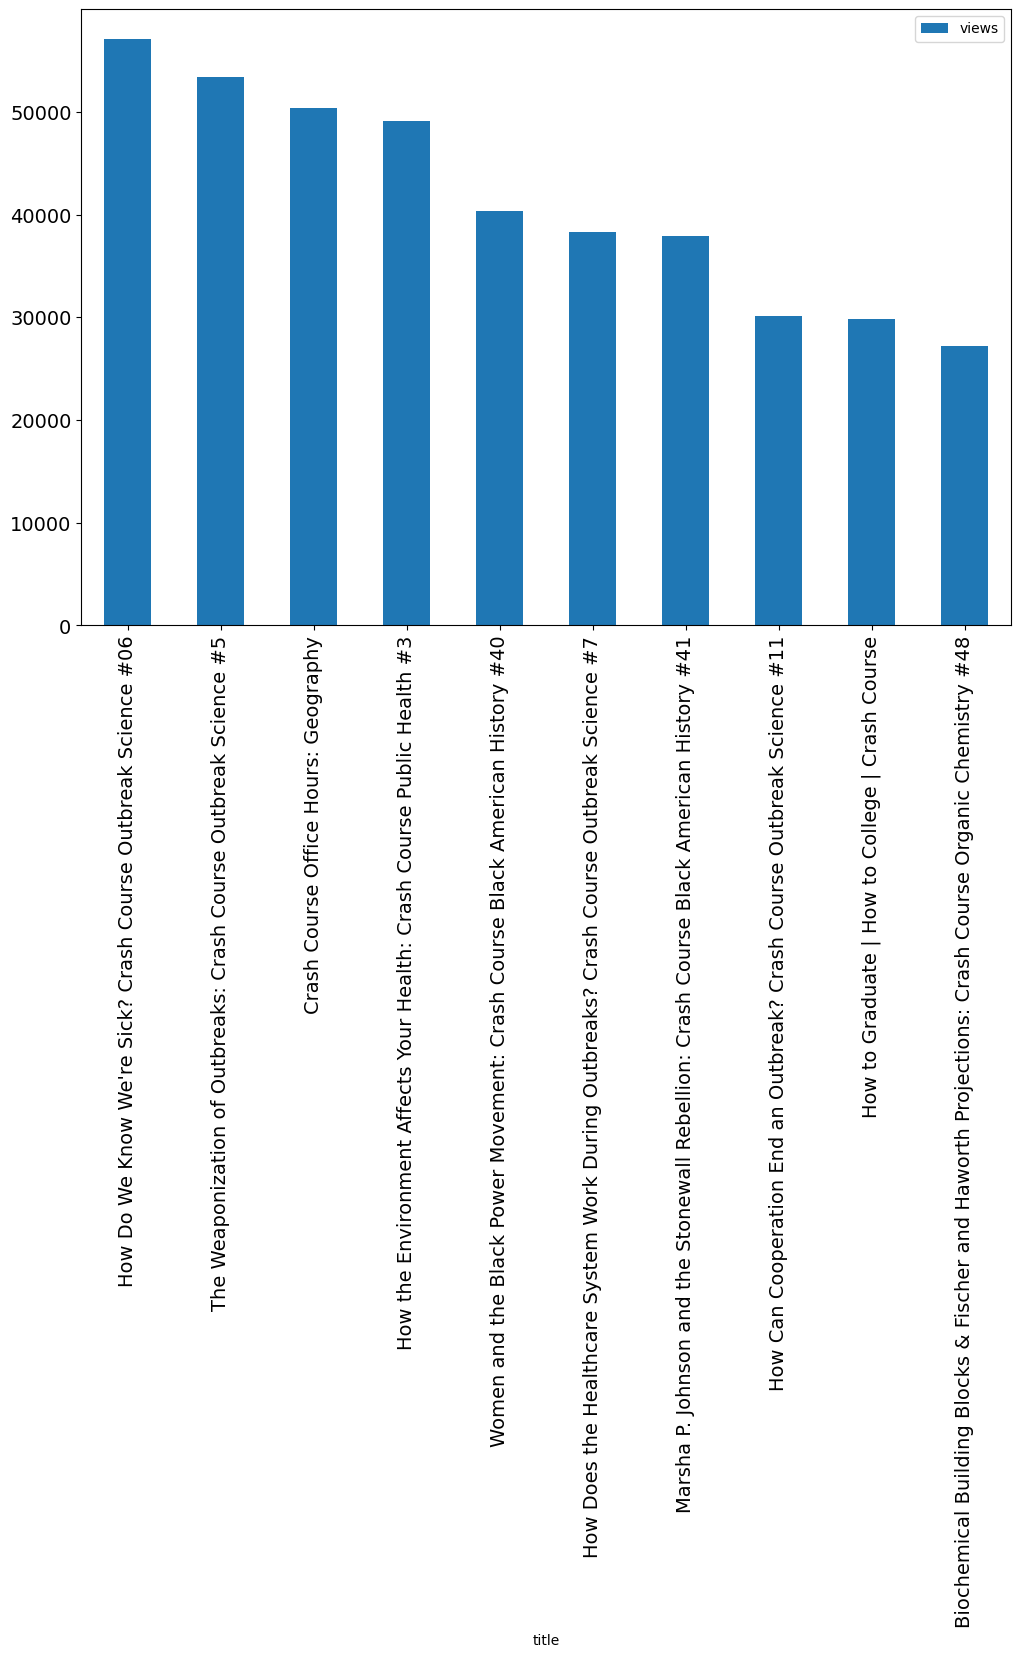

In [5]:
bottom10 = df.tail(10)

ax = bottom10.plot.bar(x='title', y='views', figsize=(12,8), fontsize=14)

In [6]:
likes_avg = top10['likes'].mean()
comments_avg = top10['comments'].mean()

print(f"""
Top 10
Average likes of 10 videos = {likes_avg}
Average comments of 10 videos = {comments_avg}
         """)


Top 10
Average likes of 10 videos = 107433.2
Average comments of 10 videos = 4480.0
         


In [7]:
bottom10 = df.tail(10)
likes_avg = bottom10['likes'].mean()
comments_avg = bottom10['comments'].mean()

print(f"""
Bottom 10
Average likes of 10 videos = {likes_avg}
Average comments of 10 videos = {comments_avg}
         """)


Bottom 10
Average likes of 10 videos = 1574.1
Average comments of 10 videos = 35.0
         
